# Module 2- Plotting in Financial Markets


   ### Welcome to the Answer notebook for Module 2 ! 
Make sure that you've submitted the module 1 notebook and unlocked Module 2 yourself before you start coding here


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 2.1 
Load the week2.csv file into a dataframe. What is the type of the Date column? Make sure it is of type datetime64. Convert the Date column to the index of the dataframe.
Plot the closing price of each of the days for the entire time frame to get an idea of what the general outlook of the stock is.

>Look out for drastic changes in this stock, you have the exact date when these took place, try to fetch the news for this day of this stock

>This would be helpful if we are to train our model to take NLP inputs.

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv("week2.csv") #Reading the week2.csv file
df.dtypes                                     #checking the datatypes
df.Date= df.Date.astype('datetime64[ns]')        #changingthe datatype of date column
df.set_index('Date',inplace = True)           #indexing the date column
df.plot(y='Close Price',title = "Variation of Close price")       #plotting the close price 
print('The news was "Punjab National Bank Q2 results: Rs 4532 cr loss"')     #news on the time of drastic change


The news was "Punjab National Bank Q2 results: Rs 4532 cr loss"


Query 2.2

 A stem plot is a discrete series plot, ideal for plotting daywise data. It can be plotted using the plt.stem() function.

Display a stem plot of the daily change in of the stock price in percentage. This column was calculated in module 1 and should be already available in week2.csv. Observe whenever there's a large change.

most of the time the variation is almost same accept one time where thereis high bull run


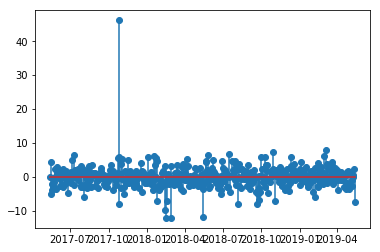

In [2]:
plt.stem(df.index,df['Day_Perc_Change'])           #stem plot of daily profit loss percentage
print("most of the time the variation is almost same accept one time where thereis high bull run")

Query 2.3

Plot the daily volumes as well and compare the percentage stem plot to it. Document your analysis of the relationship between volume and daily percentage change. 

When the Daily volumes and Daily percentage change was compared
-
-
-
-
-


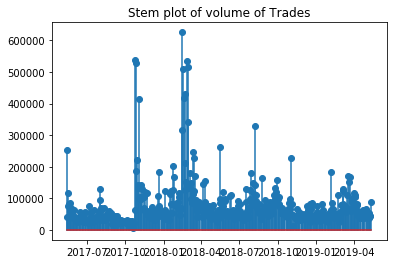

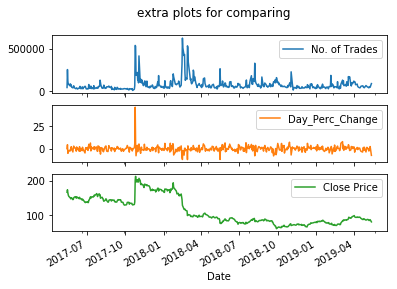

In [3]:
plt.stem(df.index,df['No. of Trades'])          #stem plot of volume of trades
plt.title('Stem plot of volume of Trades')   
#Extra plotation for comparingthe changesin profit loss percentage and total traded shares 
df.plot(y=['No. of Trades','Day_Perc_Change','Close Price'],subplots=True,title='extra plots for comparing')
#Document of the analysis
print('''When the Daily volumes and Daily percentage change was compared
-
-
-
-
-''')               #observation of relation between volume of trades and daily percentage change 

Query 2.4

We had created a Trend column in module 1. We want to see how often each Trend type occurs. This can be seen as a pie chart, with each sector representing the percentage of days each trend occurs. Plot a pie chart for all the 'Trend' to know about relative frequency of each trend. You can use the groupby function with the trend column to group all days with the same trend into a single group before plotting the pie chart. From the grouped data, create a BAR plot of average & median values of the 'Total Traded Quantity' by Trend type.

The pie and Bar graphs are


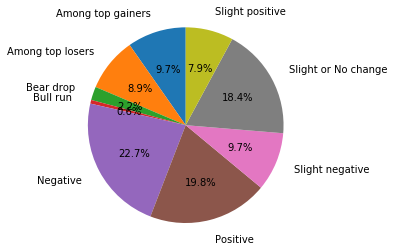

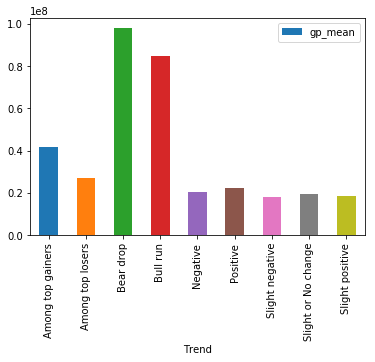

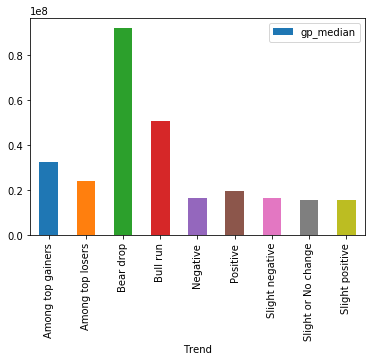

In [4]:
grouped_dataframe=df.groupby(df['Trend'])   #creating grouped dataframe
fig1,trend=plt.subplots()  #plotting the pie chart on the basis of trends
trend.pie(grouped_dataframe['Series'].count(),labels=grouped_dataframe['Series'].count().index,labeldistance=1.2,startangle=90,autopct='%1.1f%%')
trend.axis('equal')
plt.show
#Bar graph plot of trend of mean and median
new_group_df=pd.DataFrame({'gp_mean':grouped_dataframe['Total Traded Quantity'].mean().values,'gp_median':grouped_dataframe['Total Traded Quantity'].median().values},index=grouped_dataframe['Series'].count().index)
new_group_df.plot(y='gp_mean',kind='bar')
new_group_df.plot(y='gp_median',kind='bar')
print("The pie and Bar graphs are")

Query 2.5

Plot the daily return (percentage) distribution as a histogram.
Histogram analysis is one of the most fundamental methods of exploratory data analysis. In this case, it'd return a frequency plot of various values of percentage changes .

The graph is Daily percentage change


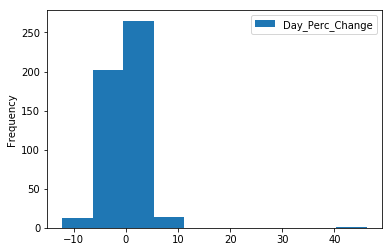

In [5]:
df.plot(y='Day_Perc_Change',kind = 'hist')   #Histogram plot of Daily percentage change
print('The graph is Daily percentage change')


Query 2.6


We next want to analyse how the behaviour of different stocks are correlated. The correlation is performed on the percentage change of the stock price instead of the stock price. 

Load any 5 stocks of your choice into 5 dataframes. Retain only rows for which ‘Series’ column has value ‘EQ’. Create a single dataframe which contains the ‘Closing Price’ of each stock. This dataframe should hence have five columns. Rename each column to the name of the stock that is contained in the column. Create a new dataframe which is a percentage change of the values in the previous dataframe. Drop Nan’s from this dataframe.
Using seaborn, analyse the correlation between the percentage changes in the five stocks. This is extremely useful for a fund manager to design a diversified portfolio. To know more, check out these resources on correlation and diversification. 

The Heatmap and Pairplot for Correlation is plotted.     
The Correlation values are


,BAJFINANCE,CIPLA,HEROMOTOCO,RELIANCE,SUNPHARMA
BAJFINANCE,1.000000,0.204306,0.190486,0.034836,0.222726
CIPLA,0.204306,1.000000,0.199631,0.103193,0.386323
HEROMOTOCO,0.190486,0.199631,1.000000,0.100351,0.114303
RELIANCE,0.034836,0.103193,0.100351,1.000000,0.044485
SUNPHARMA,0.222726,0.386323,0.114303,0.044485,1.000000


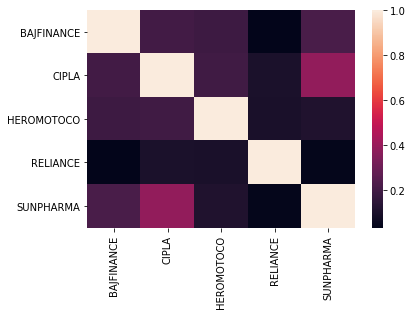

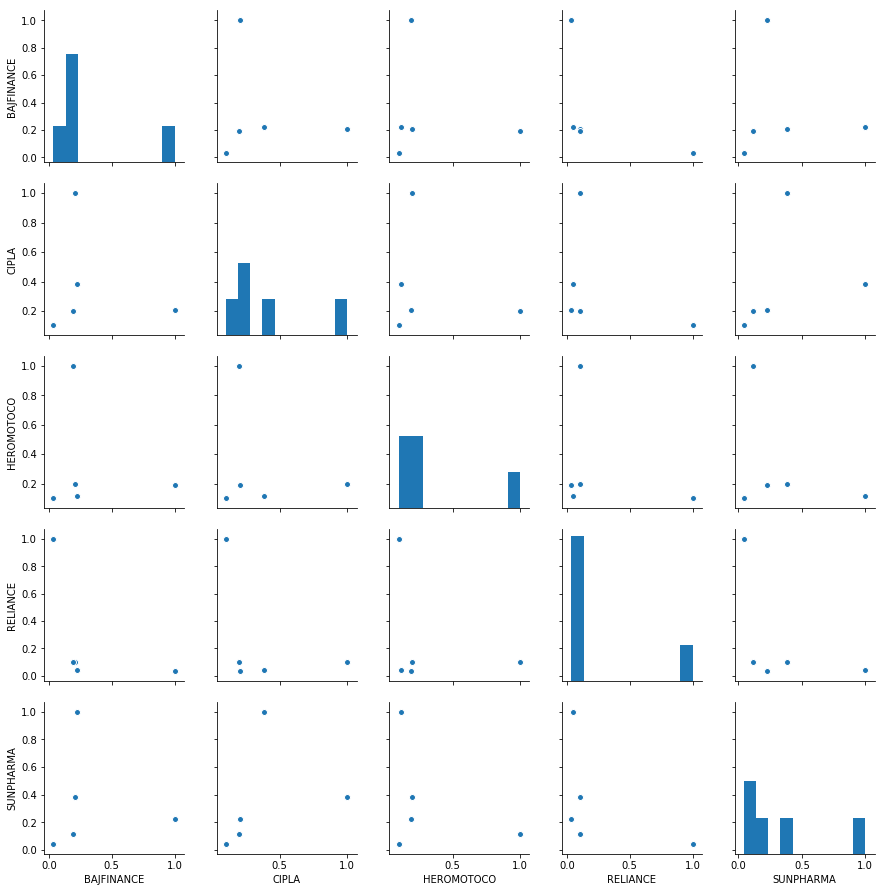

In [11]:
df1=pd.read_csv('BAJFINANCE.csv')     #Reading the dataframes of 5 different stocks
df2=pd.read_csv('CIPLA.csv')
df3=pd.read_csv('HEROMOTOCO.csv')
df4=pd.read_csv('RELIANCE.csv')
df5=pd.read_csv('SUNPHARMA.csv')

y = list()


def delete_row(cell,k):               #function to delete rows having series other than 'EQ'
    for x in k.index:
         if k.at[x,"Series"]=="EQ":
                continue
         else:
            y.append(int(x))
    return(y)


df1 = pd.read_csv('BAJFINANCE.csv',skiprows = delete_row(None,df1))    #deleting rows not containing 'EQ'
df2 = pd.read_csv('CIPLA.csv',skiprows = delete_row(None,df2))    
df3 = pd.read_csv('HEROMOTOCO.csv',skiprows = delete_row(None,df3))    
df4 = pd.read_csv('RELIANCE.csv',skiprows = delete_row(None,df4))    
df5 = pd.read_csv('SUNPHARMA.csv',skiprows = delete_row(None,df5))    

close_price_dataframe=pd.DataFrame({'BAJFINANCE':df1['Close Price'],
                                   'CIPLA':df2['Close Price'],
                                   'HEROMOTOCO':df3['Close Price'],
                                   'RELIANCE':df4['Close Price'],
                                   'SUNPHARMA':df5['Close Price']}) #creating the new dataframe containing close price
p_l_c_dataframe=close_price_dataframe                               #creating duplicate dataframe
p_l_c_dataframe.set_index(df1.Date,inplace=True)                    #setting Date as index
p_l_c_dataframe=p_l_c_dataframe.pct_change()*100                    #calculating percentage change
corr_p_l_c=p_l_c_dataframe.fillna(0).corr()                         #finding correlation
sns.heatmap(corr_p_l_c)                                             #plotting heatmap of correlation
print('''The Heatmap and Pairplot for Correlation is plotted.     
The Correlation values are''')
sns.pairplot(corr_p_l_c)                                            #pairplot of correlation
corr_p_l_c



Query 2.7

Volatility is the change in variance in the returns of a stock over a specific period of time.Do give the following documentation on volatility a read.
You have already calculated the percentage changes in several stock prices. Calculate the 7 day rolling average of the percentage change of any of the stock prices, then compute the standard deviation (which is the square root of the variance) and plot the values.
Note: pandas provides a rolling() function for dataframes and a std() function also which you can use.

The stock choosen is BajFinance.
Dataframe with additional columns of Average and S.D of BajFinance


,BAJFINANCE,CIPLA,HEROMOTOCO,RELIANCE,SUNPHARMA,roll_avg_bajfinance,roll_std_bajfinance
Date,,,,,,,
15-May-2017,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
16-May-2017,1.110319,-0.597540,2.956947,0.907671,-0.320880,0.000000,0.000000
17-May-2017,-1.702838,-0.574611,0.733547,-0.235936,-0.222273,0.000000,0.000000
18-May-2017,-0.773702,-0.400107,-1.478353,-1.903037,0.468582,0.000000,0.000000
19-May-2017,-1.932220,0.865917,-0.567921,-0.640374,-0.122334,0.000000,0.000000
22-May-2017,-3.645813,-0.327463,-0.257584,0.401865,-1.990354,0.000000,0.000000
23-May-2017,-0.676247,-5.309892,0.632991,-1.404675,-4.069359,0.000000,0.000000
24-May-2017,-0.761905,-2.541260,-0.485356,-0.601279,-1.726103,-1.197486,1.458110
25-May-2017,2.817822,-3.011642,1.632750,0.366032,-1.980116,-0.953558,1.963701


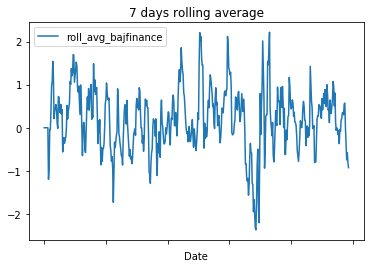

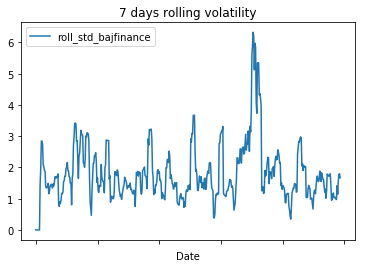

In [7]:
p_l_c_dataframe['roll_avg_bajfinance']=p_l_c_dataframe['BAJFINANCE'].rolling(7).mean() #calculating rolling average for 7 days
p_l_c_dataframe['roll_std_bajfinance']=p_l_c_dataframe['BAJFINANCE'].rolling(7).std()  #calculating rolling S.D for 7 days
p_l_c_dataframe.fillna(0,inplace=True)                                                 #removing 'NaN'
p_l_c_dataframe.plot(y='roll_avg_bajfinance',title='7 days rolling average')           #plotting mean and volatility 
p_l_c_dataframe.plot(y='roll_std_bajfinance',title='7 days rolling volatility')
print('''The stock choosen is BajFinance.
Dataframe with additional columns of Average and S.D of BajFinance''')
p_l_c_dataframe

Query 2.8

 Calculate the volatility for the Nifty index and compare the 2. This leads us to a useful indicator known as 'Beta' ( We'll be covering this in length in Module 3)

Dataframe of Nifty and column with the volatility of BajFinance to compare


,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),p_l_c_nifty,roll_std_nifty,roll_std_bajfinance
Date,,,,,,,,,
15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97,0.000000,0.000000,0.000000
16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89,0.707752,0.000000,0.000000
17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23,0.141922,0.000000,0.000000
18-May-2017,9453.20,9489.10,9418.10,9429.45,199340647,10782.46,-1.010944,0.000000,0.000000
19-May-2017,9469.90,9505.75,9390.75,9427.90,259861396,11544.77,-0.016438,0.000000,0.000000
22-May-2017,9480.25,9498.65,9427.90,9438.25,202874757,9432.97,0.109781,0.000000,0.000000
23-May-2017,9445.05,9448.05,9370.00,9386.15,231345629,11553.27,-0.552009,0.000000,0.000000
24-May-2017,9410.90,9431.90,9341.65,9360.55,218265181,11045.95,-0.272742,0.550855,1.458110
25-May-2017,9384.05,9523.30,9379.20,9509.75,298147347,16964.26,1.593923,0.813855,1.963701


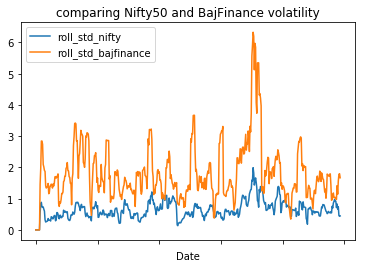

In [8]:
df_nifty=pd.read_csv("Nifty50.csv")                                              #reading Nifty.csv
df_nifty.set_index('Date',inplace=True)
df_nifty['p_l_c_nifty']=df_nifty['Close'].pct_change()*100
df_nifty['roll_std_nifty']=df_nifty['p_l_c_nifty'].rolling(7).std()             #roling S.D of time frame of 7 days 
df_nifty['roll_std_bajfinance']=p_l_c_dataframe['roll_std_bajfinance'].values   #getting the rolling S.D of BajFinance dataframes to compare
df_nifty.fillna(0,inplace=True)                                                 #removing 'NaN'
#plotting roliing S.D of Nifty and Stock of BajFinanceto compare
df_nifty.plot(y=['roll_std_nifty','roll_std_bajfinance'],title='comparing Nifty50 and BajFinance volatility')
print('Dataframe of Nifty and column with the volatility of BajFinance to compare')
df_nifty

Query 2.9

Trade Calls - Using Simple Moving Averages. Study about moving averages here. 
 
Plot the 21 day and 34 day Moving average with the average price and decide a Call ! 
Call should be buy whenever the smaller moving average (21) crosses over longer moving average (34) AND the call should be sell whenever smaller moving average crosses under longer moving average. 
One of the most widely used technical indicators.

I got confusion which stock to use.Weather the stock i chose in the above stock dataframe or the week2.csv dataframe.
So i have solved this and next problem for the both stocks.
I am using PNB i.e Week2.csv to decide the TRADE CALLS
And the BajFinance i.e the stock i have choosen.

NOTE:Close Price is used to calculate the TRADE CALLS


,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,...,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,year,month,Day_Perc_Change,Trend,trade_21,trade_34,trade_call
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-15,PNB,EQ,169.15,169.95,171.30,166.20,166.85,166.80,168.94,7476618,...,41641,1352589,18.09,2017,5,0.000000,Slight or No change,NaN,NaN,NaN
2017-05-16,PNB,EQ,166.80,167.35,178.00,164.80,173.20,174.15,173.13,51532461,...,254027,5804867,11.26,2017,5,4.406475,Among top gainers,NaN,NaN,NaN
2017-05-17,PNB,EQ,174.15,173.00,173.10,164.30,164.80,165.05,167.27,26536944,...,116512,7037498,26.52,2017,5,-5.225380,Among top losers,NaN,NaN,NaN
2017-05-18,PNB,EQ,165.05,163.40,164.40,157.90,158.25,158.50,161.06,13905573,...,76746,3245443,23.34,2017,5,-3.968494,Among top losers,NaN,NaN,NaN
2017-05-19,PNB,EQ,158.50,159.50,162.25,154.10,155.20,155.20,157.59,16311602,...,82394,2816963,17.27,2017,5,-2.082019,Negative,NaN,NaN,NaN
2017-05-22,PNB,EQ,155.20,157.50,158.00,150.25,151.05,150.95,153.77,11857847,...,61559,1874308,15.81,2017,5,-2.738402,Negative,NaN,NaN,NaN
2017-05-23,PNB,EQ,150.95,151.95,154.35,145.55,149.10,149.75,150.19,18177361,...,84779,2318975,12.76,2017,5,-0.794965,Slight negative,NaN,NaN,NaN
2017-05-24,PNB,EQ,149.75,149.70,152.35,146.50,147.30,147.45,149.16,12578488,...,63143,1093155,8.69,2017,5,-1.535893,Negative,NaN,NaN,NaN
2017-05-25,PNB,EQ,147.45,148.50,151.90,144.35,151.20,150.70,148.28,18805386,...,70546,5106397,27.15,2017,5,2.204137,Positive,NaN,NaN,NaN


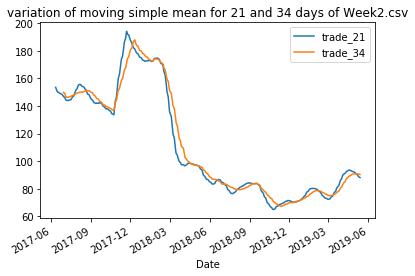

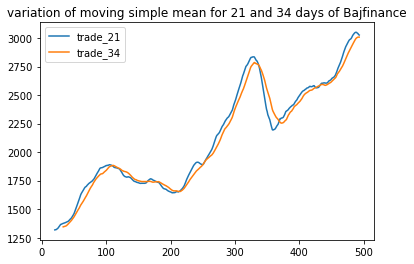

In [9]:
print('''I got confusion which stock to use.Weather the stock i chose in the above stock dataframe or the week2.csv dataframe.
So i have solved this and next problem for the both stocks.
I am using PNB i.e Week2.csv to decide the TRADE CALLS
And the BajFinance i.e the stock i have choosen.''')

print('\nNOTE:Close Price is used to calculate the TRADE CALLS')

df['trade_21']=df['Close Price'].rolling(21).mean()  #calculating rollingmean for time frame for 21 and 34 days of given stock
df['trade_34']=df['Close Price'].rolling(34).mean()  # i.e Week2.csv


df1['trade_21']=df1['Close Price'].rolling(21).mean() #calculating rollingmean for time frame for 21 and 34 days of choosen stock
df1['trade_34']=df1['Close Price'].rolling(34).mean() #i.e BajFinance


def trade_call_function(cell,k):                       #Function to set the trade calls for the stock
    for i in k.index:
        if k.at[i,'trade_21']>k.at[i,'trade_34']:
            k.at[i,'trade_call']='BUY'
        elif k.at[i,'trade_21']<k.at[i,'trade_34']:
            k.at[i,'trade_call']='SELL'
        else:
            k.at[i,'trade_call']='NaN'


            
trade_call_function(None,df)          #calling function to set the tradecall for given stock
trade_call_function(None,df1)         #calling function to set the tradecall for choosen stock

#ploting variation of 21 and 34 days of moving simple mean
df.plot(y=['trade_21','trade_34'],title='variation of moving simple mean for 21 and 34 days of Week2.csv') #Week2 i.e PNB
df1.plot(y=['trade_21','trade_34'],title='variation of moving simple mean for 21 and 34 days of Bajfinance') #choosen file

df            #dataframe of given stock

Query 2.10

Trade Calls - Using Bollinger Bands 
Plot the bollinger bands for this stock - the duration of 14 days and 2 standard deviations away from the average 
The bollinger bands comprise the following data points- 
The 14 day rolling mean of the closing price (we call it the average) 
Upper band which is the rolling mean + 2 standard deviations away from the average. 
Lower band which is the rolling mean - 2 standard deviations away from the average. 
Average Daily stock price.
Bollinger bands are extremely reliable , with a 95% accuracy at 2 standard deviations , and especially useful in sideways moving market. 
Observe the bands yourself , and analyse the accuracy of all the trade signals provided by the bollinger bands. 
Save to a new csv file. 

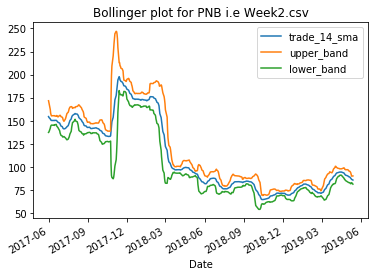

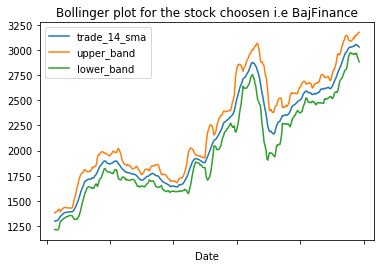

In [10]:
#this is the given stock i.e. Week2.csv
df['trade_14_sma']=df['Close Price'].rolling(14).mean()       #calculating the SMA for time frame 14 days
df['trade_14_std']=df['Close Price'].rolling(14).std()        #calculating the S.D for time frame 14 days
df['upper_band']=df['trade_14_sma']+df['trade_14_std']*2      #finding upper band
df['lower_band']=df['trade_14_sma']-df['trade_14_std']*2      #finding lower band
df.plot(y=['trade_14_sma','upper_band','lower_band'],title='Bollinger plot for PNB i.e Week2.csv') #Week2 bollinger plot
df.fillna(0,inplace=True)

#this is choosen stock i.e BajFinance
df1['trade_14_sma']=df1['Close Price'].rolling(14).mean()      #calculating the SMA for time frame 14 days
df1['trade_14_std']=df1['Close Price'].rolling(14).std()       #calculating the S.D for time frame 14 days
df1['upper_band']=df1['trade_14_sma']+df1['trade_14_std']*2    #finding upper band
df1['lower_band']=df1['trade_14_sma']-df1['trade_14_std']*2     #finding lower band
df1.plot(x='Date',y=['trade_14_sma','upper_band','lower_band'],title='Bollinger plot for the stock choosen i.e BajFinance')
df1.fillna(0,inplace=True)   #BajFinance bollinger plot

df.to_csv("NEWPNB.csv")    #saving file
df1.to_csv("NEWBAJ.csv")
